In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


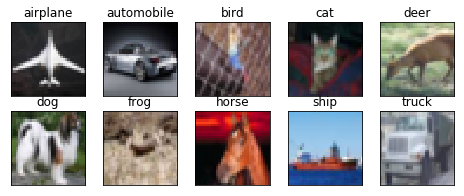

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

###Optimized Network

**Removed dense and added dropout correctly and changed Maxpool position to make desired network**

In [7]:
# Corrected model

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(64, 32, 3))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #16

model.add(Convolution2D(64, 3, 3, border_mode='same')) #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #8

model.add(Convolution2D(128,3, 3, border_mode='same')) #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(256,3, 3, border_mode='same')) #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,1)) #1
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10,8,8))

model.add(Flatten())
model.add(Activation('softmax'))

# Define Learning rate scheduler
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.006 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 32, 3..., padding="same")`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

###GradCam Implementation

In [0]:
import cv2
from keras.preprocessing import image

#return the gradCAM heatmap - gradCAm algorithm
def gradCam(imageID, model, preds): 
  #print(preds[imageID])
  #print(class_idx)
  #find the class id of the prediction of Image
  class_idx = np.argmax(preds[imageID])
  class_output = model.output[:, class_idx]

  #get the last convolutional layer
  last_conv_layer = model.get_layer("batch_normalization_7")
  #get the gradients of the last layer
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  #pool the gradients over all the axes
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  testImage = test_features[imageID]
  testImage = testImage.reshape(1,32,32,3)
  pooled_grads_value, conv_layer_output_value = iterate([testImage])

  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  img = test_features[imageID]

  #build a heatmap 
  
  #average the weighted feature map
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  #RELU
  heatmap = np.maximum(heatmap, 0)
  #normalize between 0 and 1
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  heatmap = heatmap.astype('float32')

  #superimpose the heatmap over original image
  superimposed_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
  
  #return the superimposed iaage
  return superimposed_img

###Training without CutOut

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  app.launch_new_instance()


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.006.
390/390 [==============================] - 21s 53ms/step - loss: 1.3289 - acc: 0.5238 - val_loss: 1.2279 - val_acc: 0.5870
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0045489007.
390/390 [==============================] - 16s 40ms/step - loss: 0.8684 - acc: 0.6891 - val_loss: 0.9242 - val_acc: 0.6949
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0036630037.
390/390 [==============================] - 16s 40ms/step - loss: 0.6889 - acc: 0.7577 - val_loss: 0.7774 - val_acc: 0.7373
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0030659172.
390/390 [==============================] - 16s 40ms/step - loss: 0.5813 - acc: 0.7958 - val_loss: 0.8119 - val_acc: 0.7222
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0026362039.
390/390 [==============================] - 16s 40ms/step - loss: 0.4982 - acc: 0.8252

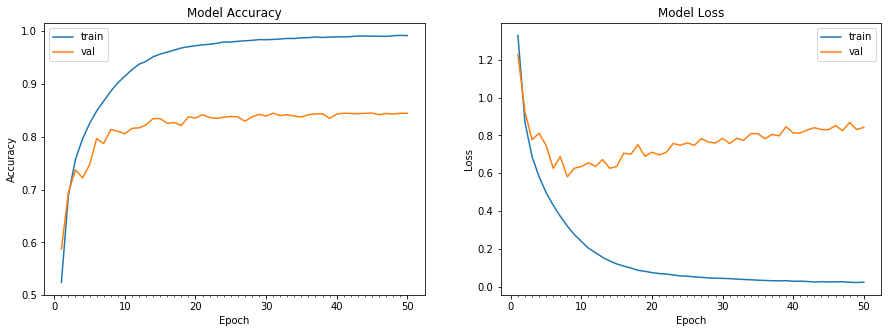

Accuracy on test data is: 84.45


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Save model weights
weights_no_cutout = ModelCheckpoint('model_weights_no_cutout.h5', save_best_only=True, monitor='val_acc', mode='max')
# Train the model
model_no_cutout = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),
                                callbacks=[weights_no_cutout, LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_no_cutout)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Visualize heatmap for predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


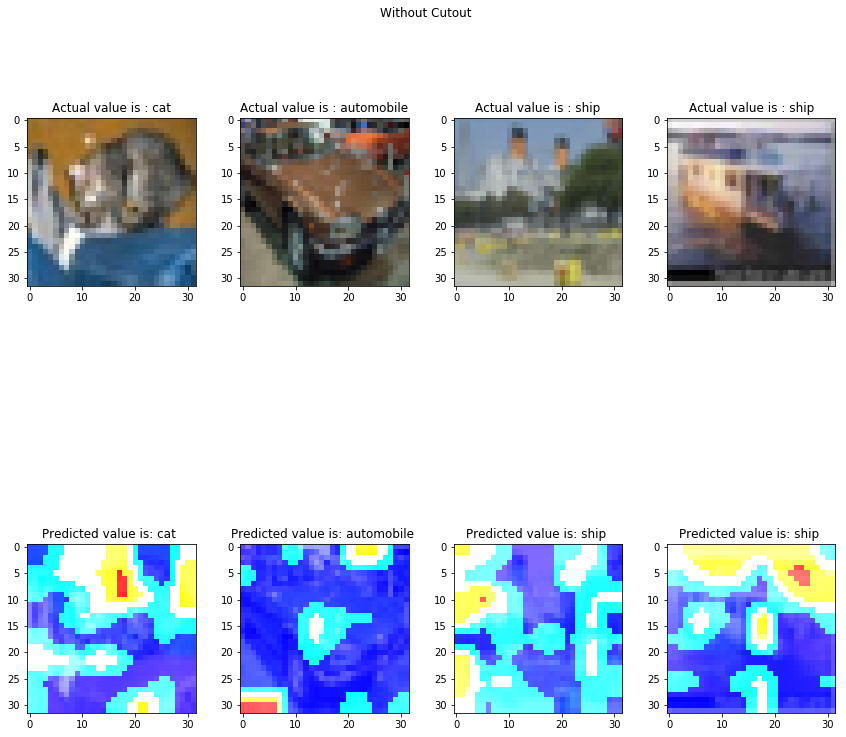

In [27]:
from google.colab.patches import cv2_imshow
from keras.models import load_model


imageIds = [0,2000,4000,6000]
#from a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(2, 4, figsize = (12, 12))
fig.tight_layout()
#give title to sub plot
fig.suptitle('Without Cutout')


#plot the original image
for i in range(len(imageIds)):
  #show the image
  ax[0,i].imshow(test_features[imageIds[i]])
  ax[0,i].set_title('Actual value is : %s' %(class_names[np.argmax(test_labels[imageIds[i]])]))



#for all the images print the heatmap of model w/o cutout
#load the model without cutout
model = load_model('model_weights_no_cutout.h5')
preds = model.predict(test_features)

for i in range(len(imageIds)):
  #get b,g,r
  b,g,r = cv2.split(gradCam(imageIds[i], model, preds))
  # switch it to rgb
  rgb_img = cv2.merge([r,g,b])     
  #img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  #uperimposed_img = gradCam(imageIds[i], model)
  #superimposed_img = cv2.resize(superimposed_img, dsize=(20, 20), interpolation=cv2.INTER_CUBIC)
  #cv2_imshow(superimposed_img)
  #show the image
  ax[1,i].imshow(rgb_img)
  #set the title of the image
  ax[1,i].set_title('Predicted value is: %s ' %(class_names[np.argmax(preds[imageIds[i]])]))

###Training with CutOut

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.006.
390/390 [==============================] - 18s 47ms/step - loss: 0.8314 - acc: 0.7248 - val_loss: 0.6626 - val_acc: 0.7752
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0045489007.
390/390 [==============================] - 16s 41ms/step - loss: 0.5167 - acc: 0.8193 - val_loss: 0.5891 - val_acc: 0.8049
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0036630037.
390/390 [==============================] - 16s 40ms/step - loss: 0.4285 - acc: 0.8474 - val_loss: 0.5531 - val_acc: 0.8217
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0030659172.
390/390 [==============================] - 16s 41ms/step - loss: 0.3750 - acc: 0.8671 - val_loss: 0.5539 - val_acc: 0.8227
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0026362039.
390/390 [==============================] - 16s 40ms/step - loss: 0.3341 - acc: 0.8813

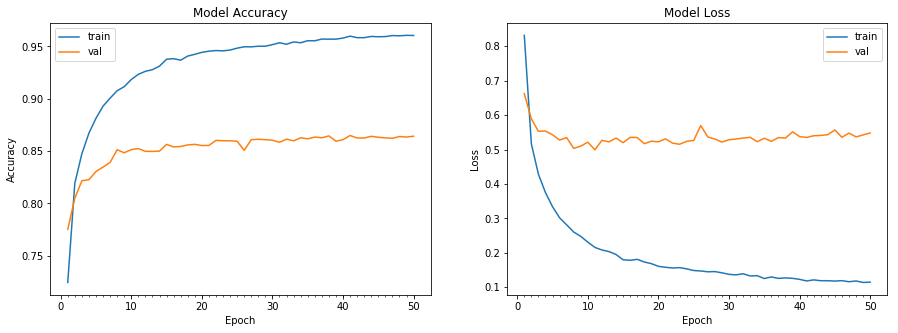

Accuracy on test data is: 86.42


In [18]:
#Define cutout function
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level= True) ,zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Save model weights
weights_cutout = ModelCheckpoint('model_weights_cutout.h5', save_best_only=True, monitor='val_acc', mode='max')
# Train the model
model_cutout = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),
                                callbacks=[weights_cutout, LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_cutout)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Visualize heatmap for new predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


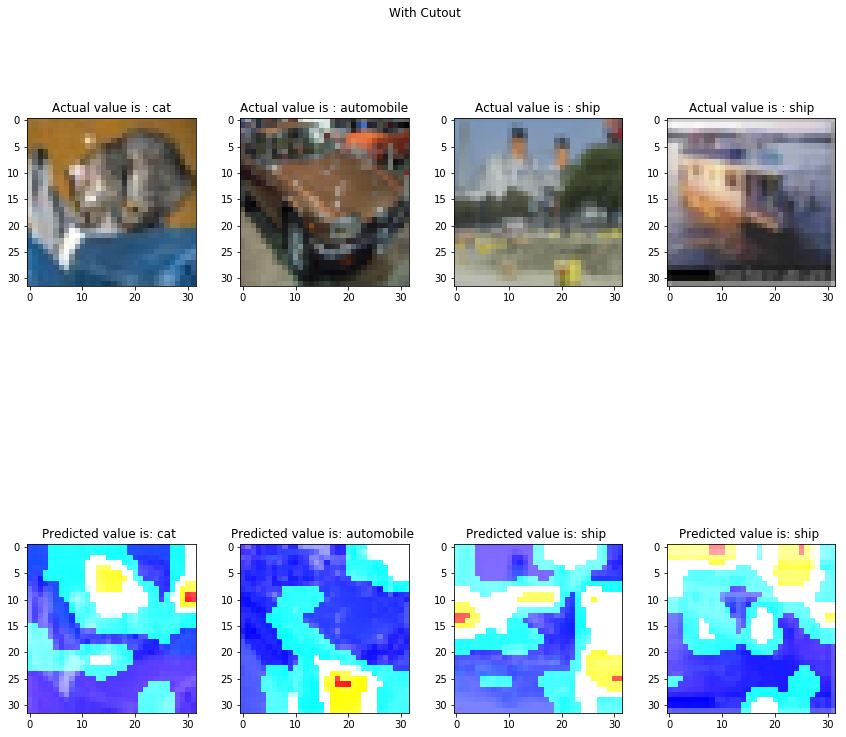

In [28]:
imageIds = [0,2000,4000,6000]
#from a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(2, 4, figsize = (12, 12))
fig.tight_layout()
#give title to sub plot
fig.suptitle('With Cutout')


#plot the original image
for i in range(len(imageIds)):
  #show the image
  ax[0,i].imshow(test_features[imageIds[i]])
  ax[0,i].set_title('Actual value is : %s' %(class_names[np.argmax(test_labels[imageIds[i]])]))



#for all the images print the heatmap of model with cutout
#load the model with cutout
model = load_model('model_weights_cutout.h5')
preds = model.predict(test_features)

for i in range(len(imageIds)):
  #get b,g,r
  b,g,r = cv2.split(gradCam(imageIds[i], model, preds))
  # switch it to rgb
  rgb_img = cv2.merge([r,g,b])     
  #img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  #uperimposed_img = gradCam(imageIds[i], model)
  #superimposed_img = cv2.resize(superimposed_img, dsize=(20, 20), interpolation=cv2.INTER_CUBIC)
  #cv2_imshow(superimposed_img)
  #show the image
  ax[1,i].imshow(rgb_img)
  #set the title of the image
  ax[1,i].set_title('Predicted value is: %s ' %(class_names[np.argmax(preds[imageIds[i]])]))

###Conclusion

***Model is saved from overfitting thanks to Data augmentation done by CutOut. The models does predictions by looking at more regions of image than just part of it.***

